In [1]:
#Importing keras libraries and packages
#import matplotlib
#matplotlib.use("Agg")
from keras.models import Sequential, save_model, load_model
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

from tensorflow.keras.preprocessing import image
from PIL import Image
import PIL
from tensorflow.keras import layers
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 


Using TensorFlow backend.


In [8]:
#step1 Initializing CNN
model= Sequential()

# step2 adding 1st Convolution layer and Pooling layer
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

# step3 adding 2nd convolution layer and polling layer
model.add(Convolution2D(32,(3,3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))


#step4 Flattening the layers
model.add(Flatten())

#step5 Full_Connection

model.add(Dense(units=32,activation = 'relu'))

model.add(Dense(units=64,activation = 'relu'))

model.add(Dense(units=128,activation = 'relu'))

model.add(Dense(units=256,activation = 'relu'))

model.add(Dense(units=256,activation = 'relu'))

model.add(Dense(units=6,activation = 'softmax'))


In [9]:
#step6 Compiling CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#step7 Fitting CNN to images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, # To rescaling the image in range of [0,1]
                                   shear_range = 0.2, # To randomly shear the images 
                                   zoom_range = 0.2, # To randomly zoom the images
                                   horizontal_flip = True) #  for randomly flipping half of the images horizontally 
test_datagen = ImageDataGenerator(rescale = 1./255)
print("\nTraining the data...\n")
training_set = train_datagen.flow_from_directory('FYP_DataSet/train',
                                                target_size=(64,64),
                                                batch_size=12, #Total no. of batches
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory('FYP_DataSet/test',
                                            target_size=(64,64),
                                            batch_size=12,
                                            class_mode='categorical')




Instructions for updating:
keep_dims is deprecated, use keepdims instead


Training the data...

Found 300 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [10]:
H=model.fit_generator(training_set,
                         samples_per_epoch=1200, # Total training images
                         nb_epoch = 20, # Total no. of epochs
                         validation_data = test_set,
                         nb_val_samples = 100) # Total testing images

C:\Users\ArsalanBangash\anaconda3\envs\facial_Mask\lib\site-packages\keras\legacy\interfaces.py:86: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=100, epochs=20, validation_steps=100)`
  '` call to the Keras 2 API: ' + signature)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Epoch 1/20





100/100 [==============================] - 27s - loss: 0.8152 - acc: 0.6575 - val_loss: 0.0617 - val_acc: 1.0000
Epoch 2/20
100/100 [==============================] - 22s - loss: 0.0766 - acc: 0.9692 - val_loss: 0.4072 - val_acc: 0.8617
Epoch 3/20
100/100 [==============================] - 23s - loss: 0.0672 - acc: 0.9800 - val_loss: 0.0147 - val_acc: 1.0000
Epoch 4/20
100/100 [==============================] - 23s - loss: 0.0610 - acc: 0.9800 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 5/20
100/100 [==============================] - 23s - loss: 0.0205 - acc: 0.9942 - val_loss: 0.0125 - val_acc: 0.9858
Epoch 6/20
100/100 [==============================] - 23s - loss: 5.7706e-04 - acc: 1.0000 - val_loss: 7.6409e-04 - val_acc: 1.0000
Epoch 7/20
100/100 [=========

In [11]:
#step8 saving model 
#classifier.save("model.h5")
model.save("my_model")

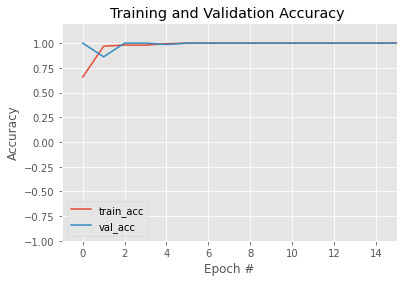

In [12]:
# plot accuracy graphs
plt.style.use("ggplot")
plt.figure()
N = 20
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training and Validation Accuracy ")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.xlim([-1,15])
plt.ylim([-1,1.2])
plt.savefig('Training and Validation Accuracy.png', bbox_inches='tight')

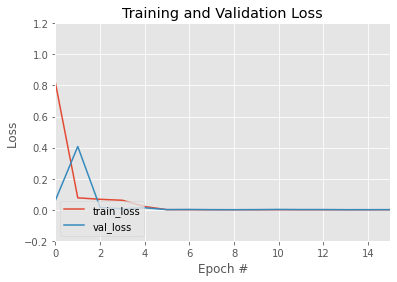

In [13]:
# plot accuracy and loss graphs
plt.style.use("ggplot")
fig=plt.figure()
N = 20
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss ")
plt.legend(loc="lower left")
plt.xlim([0,15])
plt.ylim([-0.2,1.2])
plt.savefig('Training and Validation Loss.png', bbox_inches='tight')

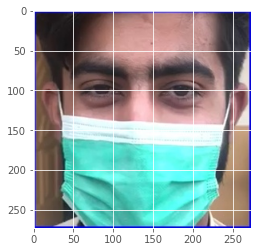

Jamal Face detected


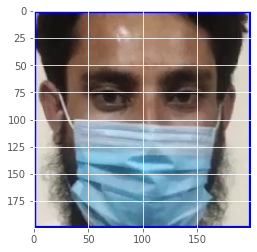

Tayyab Face detected


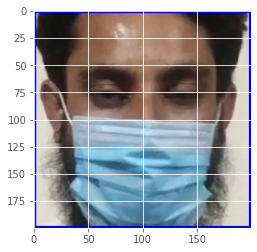

Tayyab Face detected


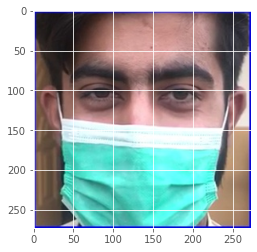

Jamal Face detected


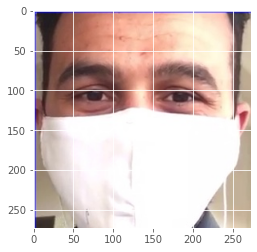

Kashif Zada Face detected


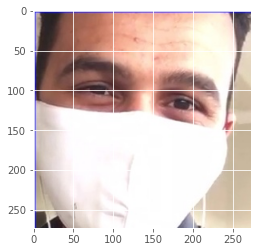

Kashif Zada Face detected


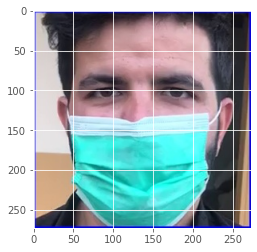

Saud Face detected


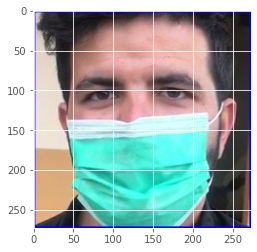

Saud Face detected


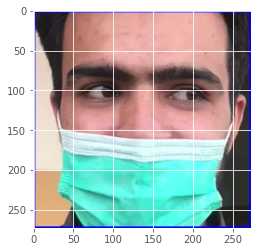

Sharjeel Face detected


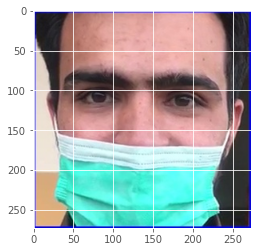

Sharjeel Face detected


In [14]:
#evaluation
dir_path ='FYP_DataSet/Evalute'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i)
    plt.imshow(img)
    img=img.resize((64,64))
    img= np.array(img)/255
    plt.show()
    
    X = image.img_to_array(img)
    X =np.expand_dims(X, 0)
    images = np.vstack([X])
    val= model.predict(X)
    #print(val)
    if val[0][0]> 0.5:
        print ('Arsalan Face detected')
    elif val[0][1]>0.5: 
        print('Jamal Face detected')
    elif val[0][2]>0.5: 
        print('Kashif Zada Face detected')
    elif val[0][3]>0.5: 
        print('Saud Face detected')
    elif val[0][4]>0.5: 
        print('Sharjeel Face detected')
    elif val[0][5]>0.5: 
        print('Tayyab Face detected')

In [15]:
# Importing the libraries
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np
from keras.preprocessing import image


In [16]:
# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [27]:
# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.5, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face


In [37]:
# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (64, 64))
       # img= np.array(face)/255
        im = Image.fromarray(face, 'RGB')
        #X = image.img_to_array(face)
        X =np.expand_dims(im, axis=0)
        images = np.vstack([X])
        val= model.predict(X)
                    
        #name="None matching"
        if val[0][0]>0.8:
            cv2.putText(frame,"Arsalan", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)
        elif val[0][1]>0.8: 
            cv2.putText(frame,"Jamal", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)
        elif val[0][2]>0.8: 
            cv2.putText(frame,"Kashif Zada", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)
        elif val[0][3]>0.8: 
            cv2.putText(frame,"Saud", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)
        elif val[0][4]>0.8: 
            cv2.putText(frame,"Sharjeel", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)
        elif val[0][5]>0.8: 
            cv2.putText(frame,"Tayyab", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)        

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()